# Imbalanced datasets

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Get the Data

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
Target_count= df.Class.value_counts()

print('Class:0 =',Target_count[0])
print('Class:1 =',Target_count[1])
print('Proportion of class 0 is ', round(Target_count[0] * 100 / (Target_count[1] + Target_count[0]), 2),'%')

Class:0 = 284315
Class:1 = 492
Proportion of class 0 is  99.83 %


<AxesSubplot:title={'center':'Count (Target)'}>

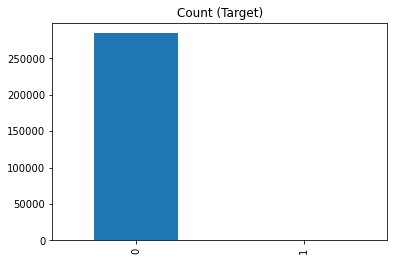

In [6]:
Target_count.plot(kind='bar', title='Count (Target)')

## The metric trap

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
df= df.dropna()

In [9]:
X = df.drop('Class',axis=1)
y = df['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier(verbosity = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.96%


**Now let's run the same code, but using only one feature (which should drastically reduce the accuracy of the classifier):**

In [11]:
model = XGBClassifier(verbosity = 0)
model.fit(X_train[['V7']], y_train)
y_pred = model.predict(X_test[['V7']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.85%


Confusion matrix:
 [[56867     8]
 [   79     8]]


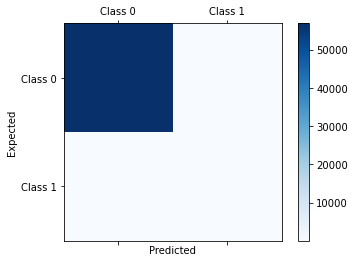

In [12]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test[['V7']])[:, 1])

0.8566108374384236

## Sample Weightage

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [15]:
print("Accuracy : ", clf.score(X_test,y_test) * 100, "%")

Accuracy :  99.88939995084442 %


In [16]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, clf.predict(X_test))
roc_auc_score(y_test, clf.decision_function(X_test))

0.8589099911582669

In [17]:
clf = LogisticRegression(class_weight = {0:5,1:95})
clf.fit(X_train,y_train)
print("Accuracy : ", clf.score(X_test,y_test) * 100, "%")
confusion_matrix(y_test, clf.predict(X_test))
roc_auc_score(y_test, clf.decision_function(X_test))

Accuracy :  99.65591095818264 %


0.9020022735884805

## Resampling

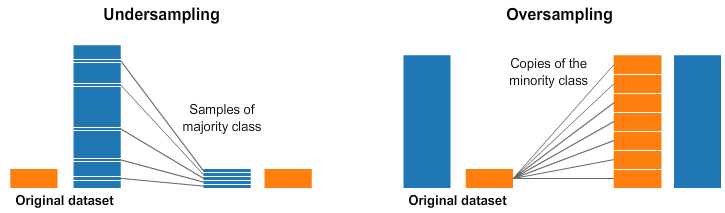

<h2 id="t7" style="margin-bottom: 18px">Python imbalanced-learn module</h2>

A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/). It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [18]:
!pip install imblearn

## Random under-sampling and over-sampling with imbalanced-learn

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X, y) #resampling the data 

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X, y) #Fit the model

In [22]:
y_ros.sum(), y.sum(), y_rus.sum()

(284315, 492, 492)

In [23]:
len(X),len(X_ros),len(X_rus)

(284807, 568630, 984)

<h2 id="t8" style="margin-bottom: 18px">Under-sampling: Tomek links</h2>

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

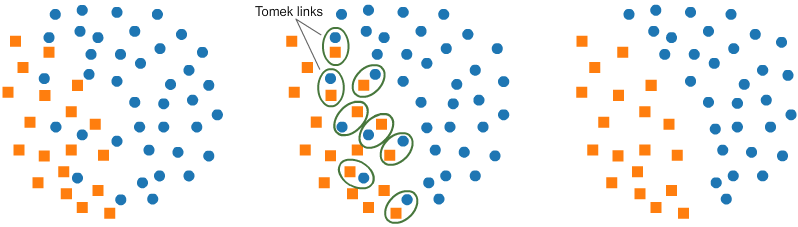

In [24]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

In [25]:
y.sum(),y_tl.sum()


(492, 492)

In [26]:
len(X),len(X_tl)

(284807, 284736)

<h2 id="t9" style="margin-bottom: 18px">Under-sampling: Cluster Centroids</h2>

In [27]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 600})
X_cc, y_cc = cc.fit_resample(X, y)

In [28]:
y.sum(),y_cc.sum()

(492, 492)

In [29]:
len(X),len(X_cc)

(284807, 1092)

<h2 id="t10" style="margin-bottom: 18px">Over-sampling: SMOTE</h2>

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

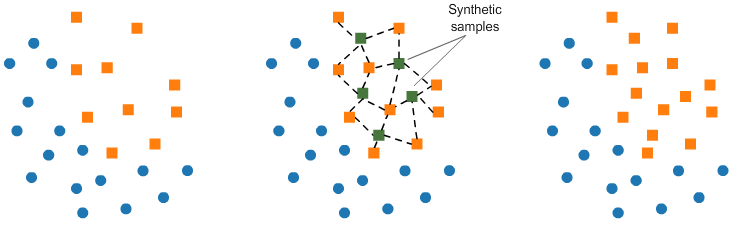

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [31]:
y.sum(),y_cc.sum()

(492, 492)

In [32]:
len(X),len(X_tl)

(284807, 284736)

<h2 id="t11" style="margin-bottom: 18px">Over-sampling followed by under-sampling</h2>

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [33]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)


## Machine Learning Model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

print( "AUROC on the sampled dataset : ",roc_auc_score(y, lr.predict_proba(X)[:, 1]))

AUROC on the sampled dataset :  0.9756329826545016


In [38]:
model = XGBClassifier(verbosity = 0)
model.fit(X_smt, y_smt)
y_pred = model.predict(X_test)
predictions = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,predictions))

Accuracy: 100.00%
ROC AUC Score 1.0


In [40]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[56875,     0],
       [    0,    87]], dtype=int64)